In [1]:
from jenga.tasks.shoes import ShoeCategorizationTask
from jenga.corruptions.image import GaussianNoiseCorruption, MotionBlurCorruption, FogCorruption, BrightnessCorruption

from jenga.evaluation.corruption_impact import CorruptionImpactEvaluator

import matplotlib.pyplot as plt

import imgaug.augmenters as iaa

### Instantiate the shoe categorization task and train a baseline model

In [2]:
task = ShoeCategorizationTask(seed=42)

baseline_model = task.fit_baseline_model()

375/375 [==============================] - 10s 26ms/step - loss: 0.2182 - accuracy: 0.9105


### Train another model on data augmented with gaussian noise corruptions 

In [3]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = GaussianNoiseCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

gaussian_noise_model = task.fit_baseline_model(np.concatenate(augmented_data), np.concatenate(augmented_labels))

750/750 [==============================] - 21s 27ms/step - loss: 0.2237 - accuracy: 0.9095


### Evaluate how well both models can handle corrupted test data

In [4]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(GaussianNoiseCorruption(fraction=fraction, severity=4))
    
gaussian_noise_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
gaussian_noise_results_aug = evaluator.evaluate(gaussian_noise_model, 10, *corruptions)    

0/70 (1.7151489999999967)
10/70 (18.760072000000008)
20/70 (37.013206999999994)
30/70 (56.835477999999995)
40/70 (80.037444)
50/70 (111.41870599999999)
60/70 (146.90315499999997)
0/70 (2.0016560000000254)
10/70 (22.10497300000003)
20/70 (43.601815999999985)
30/70 (64.60847000000001)
40/70 (87.89462200000003)
50/70 (113.21726799999999)
60/70 (141.13453299999998)


### Train another model on data augmented with motion blur corruptions 

In [5]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = MotionBlurCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

motion_blur_model = task.fit_baseline_model(np.concatenate(augmented_data), np.concatenate(augmented_labels))

750/750 [==============================] - 14s 18ms/step - loss: 0.2386 - accuracy: 0.9002


### Evaluate how well both models can handle corrupted test data

In [6]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(MotionBlurCorruption(fraction=fraction, severity=4))
    
motion_blur_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
motion_blur_results_aug = evaluator.evaluate(motion_blur_model, 10, *corruptions)    

0/70 (2.025310999999988)
10/70 (22.65146500000003)
20/70 (45.90273500000001)
30/70 (72.29806099999996)
40/70 (104.37101099999995)
50/70 (146.48615499999994)
60/70 (197.90038800000002)
0/70 (2.0925270000000182)
10/70 (23.87525800000003)
20/70 (47.606025000000045)
30/70 (74.47148800000002)
40/70 (107.74847399999999)
50/70 (150.84968400000002)
60/70 (203.68719600000009)


### Train another model on data augmented with fog corruptions 

In [7]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = FogCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

fog_model = task.fit_baseline_model(np.concatenate(augmented_data), np.concatenate(augmented_labels))

750/750 [==============================] - 14s 18ms/step - loss: 0.2890 - accuracy: 0.8778


### Evaluate how well both models can handle corrupted test data

In [8]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(FogCorruption(fraction=fraction, severity=4))
    
fog_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
fog_results_aug = evaluator.evaluate(fog_model, 10, *corruptions)   

0/70 (2.200454000000036)
10/70 (23.294930999999906)
20/70 (45.408676000000014)
30/70 (69.36430100000007)
40/70 (96.90667899999994)
50/70 (130.59639399999992)
60/70 (169.89467100000002)
0/70 (2.0020600000000286)
10/70 (23.09771899999987)
20/70 (45.07968499999993)
30/70 (68.29194099999995)
40/70 (95.75581699999998)
50/70 (128.69689500000004)
60/70 (167.956999)


### Plot the results

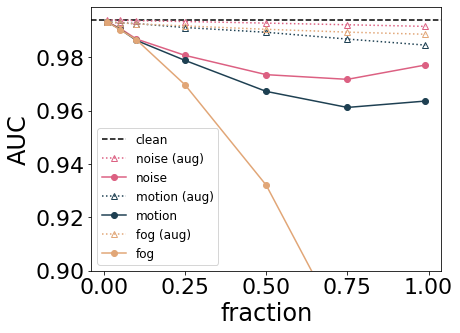

In [9]:
def as_series(results):
    medians = []
    for result in results:
        medians.append(np.median(result.corrupted_scores))
    return medians

ax = plt.gca()        

fractions = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]
markersize=6

l = ax.axhline(gaussian_noise_results[0].baseline_score, linestyle='--', color='black')    

plt.plot(fractions, as_series(gaussian_noise_results_aug), color='#dc6082', linestyle='dotted', marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(gaussian_noise_results), color='#dc6082', marker='o', markersize=markersize)

plt.plot(fractions, as_series(motion_blur_results_aug), color='#1e4052', linestyle='dotted', marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(motion_blur_results), color='#1e4052', marker='o', markersize=markersize)

plt.plot(fractions, as_series(fog_results_aug), color='#e1a677', linestyle='dotted', marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(fog_results), color='#e1a677', marker='o', markersize=markersize)


ax.set_ylim((0.9, 0.999))
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=22)    
ax.set_ylabel('AUC', fontsize=24)
ax.set_xlabel('fraction', fontsize=24)
    
ax.legend(['clean', 'noise (aug)', 'noise', 'motion (aug)', 'motion', 'fog (aug)', 'fog'], fontsize=12)    
    
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)

plt.show()